# Logistic Regression
Logistic regression with different data sets

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

Loading the dataset 

In [25]:
X_train, y_train = load_data('ex2data1.txt')


In [26]:
#first five elements is 
print(f"First five elements are : \n {X_train[:5]}")
print(f"Type of X_train : {type(X_train)}")
print(f"Shape of X_train is : {X_train.shape}")

First five elements are : 
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train : <class 'numpy.ndarray'>
Shape of X_train is : (100, 2)


In [27]:
#first five elements in y are

print(f"First 5 values in y are: {y_train[:5]}")
print(f"Type of y_train is : {type(y_train)}")

First 5 values in y are: [0. 0. 0. 1. 1.]
Type of y_train is : <class 'numpy.ndarray'>


In [28]:
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Number of training examples : {len(y_train)}")

Shape of X_train is : (100, 2)
Shape of y_train is : (100,)
Number of training examples : 100


# Visualizing the data

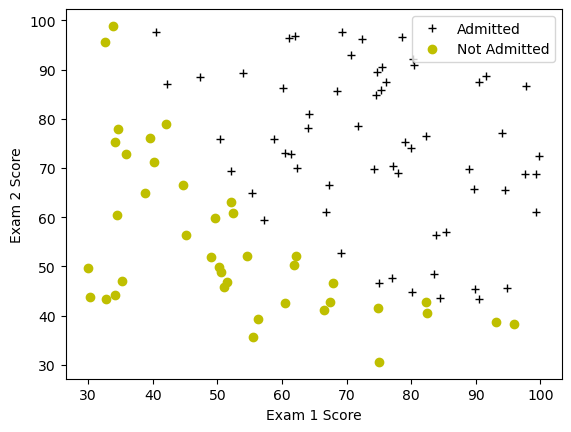

In [29]:
#plotting examples
plot_data(X_train, y_train, pos_label="Admitted", neg_label= "Not Admitted")

#set y label
plt.ylabel('Exam 2 Score')
plt.xlabel('Exam 1 Score')
plt.legend(loc = "upper right")
plt.show()

Sigmoid Function definition

In [30]:
#function for sigmoid function
def sigmoid(z):
    g = 1/ (1 + np.exp(-z))
    
    return g

In [31]:
#sigmoid test
print(f"sigmoid(0) : {sigmoid(0)}")

sigmoid(0) : 0.5


In [32]:
#sigmoid for an array
print(f"Sigmoid [-1, 0, 1, 2]: {sigmoid(np.array([-1,0,1,2])).tolist()}")

from public_tests import *
sigmoid_test(sigmoid)

Sigmoid [-1, 0, 1, 2]: [0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823]
All tests passed!


# Cost function for logistic regression

In [33]:
#compute cost function for logistic regression
def compute_cost(X, y, w, b, lambda_ = 1):
    
    m,n = X.shape
    
    total_cost = 0
    
    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)
        total_cost += (-y[i]*np.log(g)) - (1 - y[i])*np.log(1 - g)
        
    total_cost = total_cost / m
    
    
    return total_cost

In [34]:
m,n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [35]:
compute_cost_test(compute_cost)

All tests passed!


# Gradient descent for logistic regression

In [36]:
#compute gradient
def compute_gradient(X,y,w,b, lambda_ = None):
    
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    
    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i]) * X[i,j]
            dj_dw[j] += dj_dw_ij
            
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

In [37]:
#compute gradient descent
#testing gradient descent with zero values for w and b
initial_w = np.zeros(n)
initial_b = 0

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)

print(f"dj_db at initial w (zeros) : {dj_db}")
print(f"dj_dw at initial w (zeros) : {dj_dw.tolist()}")

dj_db at initial w (zeros) : -0.1
dj_dw at initial w (zeros) : [-12.00921658929115, -11.262842205513591]


In [38]:
#compute gradient descent for non-zero values for w and b
test_w = np.array([0.2, -0.5])
test_b = -24

dj_db, dj_dw = compute_gradient(X_train, y_train, test_w, test_b)

print(f"dj_db at test w : {dj_db}")
print(f"dj_db at test w : {dj_dw.tolist()}")

#unit testing
compute_gradient_test(compute_gradient)

dj_db at test w : -0.5999999999991071
dj_db at test w : [-44.831353617873795, -44.37384124953978]
All tests passed!


# Learning parameters using gradient descent

In [39]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    
    #number of training examples
    m = len(X)
    
    #array to store J and w's values at each iteration 
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        
        #calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        
        #update parameters of w and b using gradient descent 
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        
        #Save cost J at each iteration
        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            
            
        #print cost at every 10 intervals
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
            
    return w_in, b_in, J_history, w_history

In [44]:
print(f"shape of X: {X_train.shape}")


np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(n) - 0.5)
initial_b = -8

print(f"Shape of w : {initial_w.shape}")
#some gradient descent settings
iterations = 100000
alpha = 0.001

w,b,J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient,
                                  alpha, iterations, 0)

shape of X: (100, 2)
Shape of w : (2,)
Iteration    0: Cost     0.96 
Iteration 10000: Cost     0.30 
Iteration 20000: Cost     0.30 
Iteration 30000: Cost     0.30 
Iteration 40000: Cost     0.29 
Iteration 50000: Cost     0.29 
Iteration 60000: Cost     0.29 
Iteration 70000: Cost     0.28 
Iteration 80000: Cost     0.28 
Iteration 90000: Cost     0.28 
Iteration 99999: Cost     0.28 
